<a href="https://colab.research.google.com/github/JorgeZarama/Supervisado/blob/main/Programa10_EvaluacionRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [5]:
import warnings
warnings.filterwarnings(action='ignore',module='sklearn')

In [8]:
# Cargar y explorar los datos
#sklearn.datasets.fetch_california_housing
datos = datasets.fetch_california_housing()
# datos = datasets.fetch_california_housing()
pprint(datos)
print(np.shape(datos.data))

{'DESCR': '.. _california_housing_dataset:\n'
          '\n'
          'California Housing dataset\n'
          '--------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 20640\n'
          '\n'
          '    :Number of Attributes: 8 numeric, predictive attributes and the '
          'target\n'
          '\n'
          '    :Attribute Information:\n'
          '        - MedInc        median income in block group\n'
          '        - HouseAge      median house age in block group\n'
          '        - AveRooms      average number of rooms per household\n'
          '        - AveBedrms     average number of bedrooms per household\n'
          '        - Population    block group population\n'
          '        - AveOccup      average number of household members\n'
          '        - Latitude      block group latitude\n'
          '        - Longitude     block group longitude\n'
          '\n'
  

In [9]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target

In [10]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Estandarización de los datos de entrenamiento y test
stdr = preprocessing.StandardScaler()
X_train = stdr.fit_transform(X_train)
X_test = stdr.transform(X_test)

In [12]:
# Métricas de evaluación.
metricas = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
    'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [13]:
# Definimos un algoritmo SVM de regresión
alg = SVR(C=100, gamma='auto', kernel='rbf')

In [14]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

In [15]:
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([36.14639115, 35.91406822, 36.69874477, 34.68361282, 38.11109757]),
 'score_time': array([1.12025952, 1.14379144, 1.12613559, 1.12081933, 1.12474346]),
 'test_MAE': array([-0.38104007, -0.36816273, -0.36099214, -0.37856181, -0.36355256]),
 'test_MAPE': array([-20.61591729, -19.99201667, -19.70494833, -20.76090001,
       -19.31096575]),
 'test_MSE': array([-0.33342758, -0.31964361, -0.30184863, -0.35157428, -0.30000514]),
 'test_RMSE': array([-0.57743189, -0.56537033, -0.54940753, -0.592937  , -0.54772725])}


In [18]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=100, gamma='auto', kernel='rbf')
model = model.fit(X_train, y_train)

In [19]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Test results (MAE): ', np.round(mae,4))
print('Test results (r2): ', np.round(r2,4))

Test results (MAE):  0.3717
Test results (r2):  0.7557


In [20]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [0.5 1.4 4.8 2.5 3.  1.6 2.5 1.6 2.4 4.7]
Valores reales:  [0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]


In [21]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

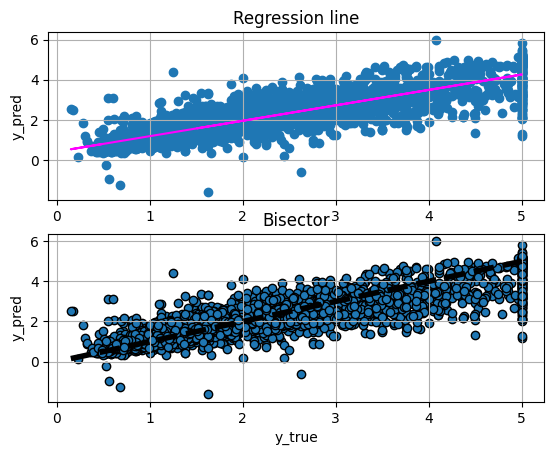

In [22]:
report_regression_graphics(y_test, y_pred)